In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv('course_page_actions.csv')

In [3]:
print (df.head(10))
print (df.tail(10))

                    timestamp      id       group  action    duration
0  2016-09-24 17:14:52.012145  261869  experiment    view  130.545004
1  2016-09-24 18:45:09.645857  226546  experiment    view  159.862440
2  2016-09-24 19:16:21.002533  286353  experiment    view   79.349315
3  2016-09-24 19:43:06.927785  842279  experiment    view   55.536126
4  2016-09-24 21:08:22.790333  781883  experiment    view  204.322437
5  2016-09-24 17:14:52.012145  261869  experiment    view  130.545004
6  2016-09-24 18:45:09.645857  226546  experiment    view  159.862440
7  2016-09-24 19:16:21.002533  286353  experiment    view   79.349315
8  2016-09-24 19:43:06.927785  842279  experiment    view   55.536126
9  2016-09-24 21:08:22.790333  781883  experiment  enroll  204.322437
                       timestamp      id       group  action    duration
4064  2017-01-18 07:08:08.464201  906893  experiment    view   54.512907
4065  2017-01-18 07:11:22.563679  845571  experiment  enroll  160.567579
4066  2017-

In [4]:
# Get dataframe of control group:
control_df = df.query('group == "control"')

# In control group, compute click thru rate:
control_ctr = control_df.query('action == "enroll"').id.nunique()/control_df.query('action == "view"').id.nunique()

# Display click through rate:
control_ctr

0.2364438839848676

In [5]:
 # Get dataframe of experiment group:
experiment_df = df.query('group == "experiment"')

# In experiment group, compute click thru rate:
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique()/experiment_df.query('action == "view"').id.nunique()

# Display click through rate:
experiment_ctr

0.2668693009118541

In [6]:
# Compute the observed difference in click thru rates:
obs_diff = experiment_ctr - control_ctr

# Display observed difference:
obs_diff

0.030425416926986526

In [9]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping:
diffs = []
size = df.shape[0]
for i in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique()/control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([  17.,  131.,  667., 1782., 2778., 2609., 1486.,  439.,   77.,
          14.]),
 array([-0.02457464, -0.01333697, -0.0020993 ,  0.00913838,  0.02037605,
         0.03161372,  0.0428514 ,  0.05408907,  0.06532674,  0.07656441,
         0.08780209]),
 <a list of 10 Patch objects>)

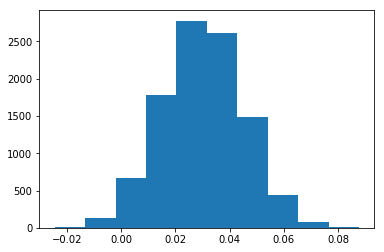

In [10]:
# Convert to numpy array:
diffs = np.array(diffs)

# Plot sampling distribution:
plt.hist(diffs)

(array([   8.,   58.,  428., 1410., 2716., 2876., 1765.,  614.,  108.,
          17.]),
 array([-0.06038866, -0.0486169 , -0.03684515, -0.0250734 , -0.01330165,
        -0.0015299 ,  0.01024185,  0.02201361,  0.03378536,  0.04555711,
         0.05732886]),
 <a list of 10 Patch objects>)

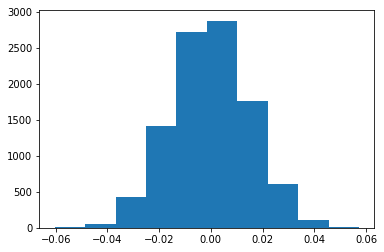

In [11]:
# Simulate distribution under the NULL Hypothesis:
null_vals = np.random.normal(0, diffs.std(), diffs.size)
# Plot the null distribution:
plt.hist(null_vals)

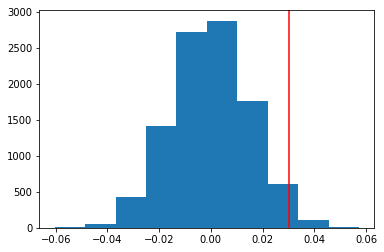

In [12]:
# Plot observed statistic with the NULL distribution:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'red');